# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
    


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | puerto colombia
Processing Record 5 of Set 1 | la sarre
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | bandon
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | afaahiti
Processing Record 12 of Set 1 | cockburn town
Processing Record 13 of Set 1 | rabigh
Processing Record 14 of Set 1 | ponta delgada
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | mont-dore
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | kendari
Processing Record 19 of Set 1 | flying fish cove
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | susuman
Processing Record 22 o

Processing Record 38 of Set 4 | waging am see
Processing Record 39 of Set 4 | kilindoni
Processing Record 40 of Set 4 | panghyon-dong
Processing Record 41 of Set 4 | port shepstone
Processing Record 42 of Set 4 | colonia
Processing Record 43 of Set 4 | takestan
Processing Record 44 of Set 4 | yagry
City not found. Skipping...
Processing Record 45 of Set 4 | jodhpur
Processing Record 46 of Set 4 | puerto aysen
Processing Record 47 of Set 4 | that phanom
Processing Record 48 of Set 4 | minot
Processing Record 49 of Set 4 | tocaima
Processing Record 0 of Set 5 | saint-louis
Processing Record 1 of Set 5 | weiser
Processing Record 2 of Set 5 | g'uzor
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | rio grande
Processing Record 5 of Set 5 | vuktyl
Processing Record 6 of Set 5 | la libertad
Processing Record 7 of Set 5 | port elizabeth
Processing Record 8 of Set 5 | sinabang
Processing Record 9 of Set 5 | la passe
Processing Record 10 of Set 5 | tibanbang
Processing Record 

Processing Record 29 of Set 8 | little cayman
City not found. Skipping...
Processing Record 30 of Set 8 | nar'yan-mar
Processing Record 31 of Set 8 | muynoq
Processing Record 32 of Set 8 | santa elena de uairen
Processing Record 33 of Set 8 | owando
Processing Record 34 of Set 8 | bhadrakh
Processing Record 35 of Set 8 | klyuchi
Processing Record 36 of Set 8 | ulladulla
Processing Record 37 of Set 8 | san juan de los lagos
Processing Record 38 of Set 8 | punta del este
Processing Record 39 of Set 8 | reitz
Processing Record 40 of Set 8 | bolu
Processing Record 41 of Set 8 | san antonio de pale
Processing Record 42 of Set 8 | serdar
Processing Record 43 of Set 8 | antofagasta
Processing Record 44 of Set 8 | puerto deseado
Processing Record 45 of Set 8 | ghat
Processing Record 46 of Set 8 | sitka
Processing Record 47 of Set 8 | kharan
Processing Record 48 of Set 8 | cambria
Processing Record 49 of Set 8 | manggar
Processing Record 0 of Set 9 | arraial do cabo
Processing Record 1 of Set 9

Processing Record 15 of Set 12 | neiafu
Processing Record 16 of Set 12 | minas de marcona
Processing Record 17 of Set 12 | tahe
Processing Record 18 of Set 12 | suva
Processing Record 19 of Set 12 | margate
Processing Record 20 of Set 12 | revda
Processing Record 21 of Set 12 | calama
Processing Record 22 of Set 12 | drayton valley
Processing Record 23 of Set 12 | mandimba
City not found. Skipping...
Processing Record 24 of Set 12 | olavarria
Processing Record 25 of Set 12 | waddan
Processing Record 26 of Set 12 | mirny
Processing Record 27 of Set 12 | ryotsu-minato
Processing Record 28 of Set 12 | mejit
Processing Record 29 of Set 12 | kijang
Processing Record 30 of Set 12 | felixstowe
Processing Record 31 of Set 12 | gao
Processing Record 32 of Set 12 | dolinsk
Processing Record 33 of Set 12 | salalah
Processing Record 34 of Set 12 | sur
Processing Record 35 of Set 12 | bria
Processing Record 36 of Set 12 | port douglas
Processing Record 37 of Set 12 | hadibu
Processing Record 38 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,274.05,74,52,3.04,GS,1704157015
1,edinburgh of the seven seas,-37.0676,-12.3116,289.72,90,100,2.13,SH,1704157016
2,atafu village,-8.5421,-172.5159,301.91,68,100,1.31,TK,1704157017
3,puerto colombia,10.9878,-74.9547,300.20,79,11,11.90,CO,1704157018
4,la sarre,48.8002,-79.1996,267.97,73,98,5.59,CA,1704156899


In [6]:
# Convert Max Temp from Kelvin -> Fahrenheit -> Celsius
city_data_df['Max Temp'] = (city_data_df['Max Temp'] - 273.15) * 9/5 + 32
city_data_df['Max Temp'] = (city_data_df['Max Temp'] - 32) * 5/9
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.90,74,52,3.04,GS,1704157015
1,edinburgh of the seven seas,-37.0676,-12.3116,16.57,90,100,2.13,SH,1704157016
2,atafu village,-8.5421,-172.5159,28.76,68,100,1.31,TK,1704157017
3,puerto colombia,10.9878,-74.9547,27.05,79,11,11.90,CO,1704157018
4,la sarre,48.8002,-79.1996,-5.18,73,98,5.59,CA,1704156899


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.90,74,52,3.04,GS,1704157015
1,edinburgh of the seven seas,-37.0676,-12.3116,16.57,90,100,2.13,SH,1704157016
2,atafu village,-8.5421,-172.5159,28.76,68,100,1.31,TK,1704157017
3,puerto colombia,10.9878,-74.9547,27.05,79,11,11.90,CO,1704157018
4,la sarre,48.8002,-79.1996,-5.18,73,98,5.59,CA,1704156899


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

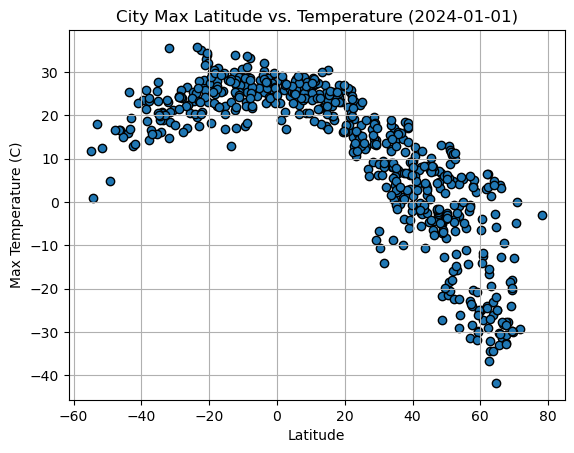

In [9]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
plt.scatter(lat,max_temp, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-01-01)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

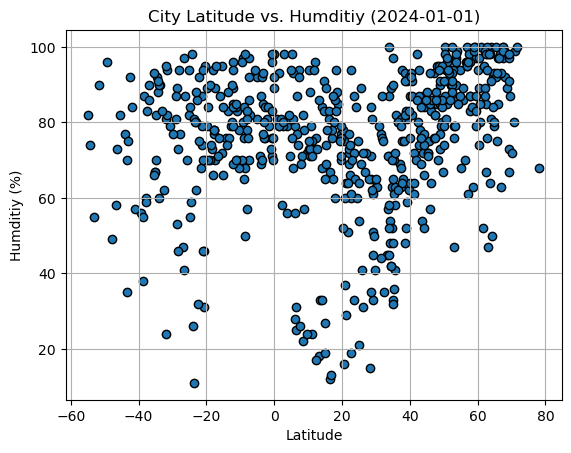

In [10]:
# Build the scatter plots for latitude vs. humidity
humitidy = city_data_df['Humidity']
plt.scatter(lat,humitidy, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humditiy (%)")
plt.title("City Latitude vs. Humditiy (2024-01-01)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

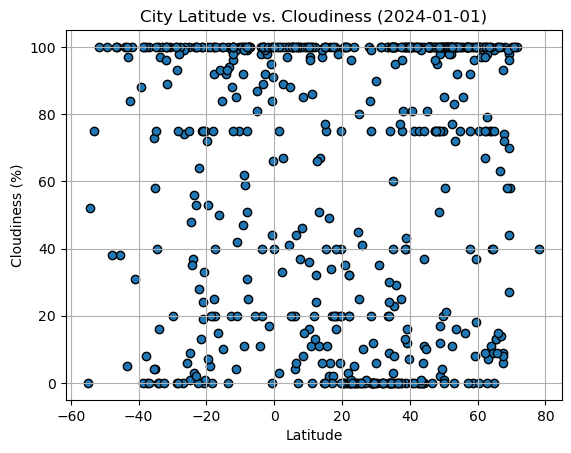

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(lat,cloudiness, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-01-01)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

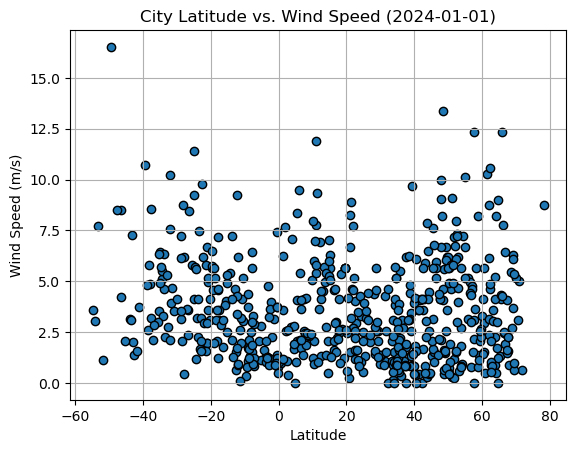

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(lat,wind_speed, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-01-01)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def regression_analysis(df,x_col,y_col):
    x = df[x_col].values
    y = df[y_col].values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    if df[x_col].min() > 0:
        plt.annotate(line_eq, (35, 15), fontsize=15, color="red")
    else:
        plt.annotate(line_eq, (-40, 11), fontsize=15, color="red")
    print(f"The r-value is : {rvalue**2}")


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto colombia,10.9878,-74.9547,27.05,79,11,11.90,CO,1704157018
4,la sarre,48.8002,-79.1996,-5.18,73,98,5.59,CA,1704156899
6,longyearbyen,78.2186,15.6401,-3.09,68,40,8.75,SJ,1704157020
7,bandon,51.7469,-8.7425,10.77,94,100,7.18,IE,1704157020
8,yellowknife,62.4560,-114.3525,-16.71,85,100,4.63,CA,1704156930


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.90,74,52,3.04,GS,1704157015
1,edinburgh of the seven seas,-37.0676,-12.3116,16.57,90,100,2.13,SH,1704157016
2,atafu village,-8.5421,-172.5159,28.76,68,100,1.31,TK,1704157017
5,port-aux-francais,-49.3500,70.2167,4.76,96,100,16.52,TF,1704157019
9,hithadhoo,-0.6000,73.0833,27.52,76,84,1.35,MV,1704157022


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.7313070940592583


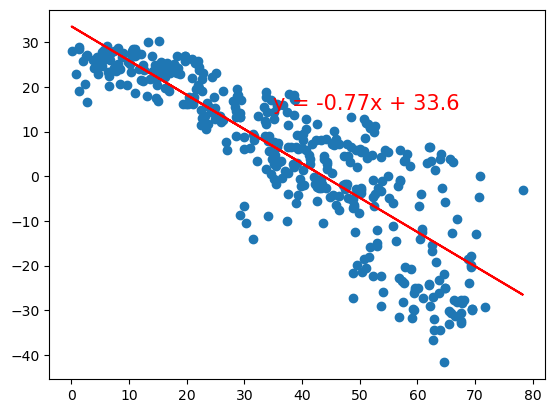

In [16]:
# Linear regression on Northern Hemisphere
regression_analysis(northern_hemi_df,'Lat','Max Temp')

The r-value is : 0.3334110343438196


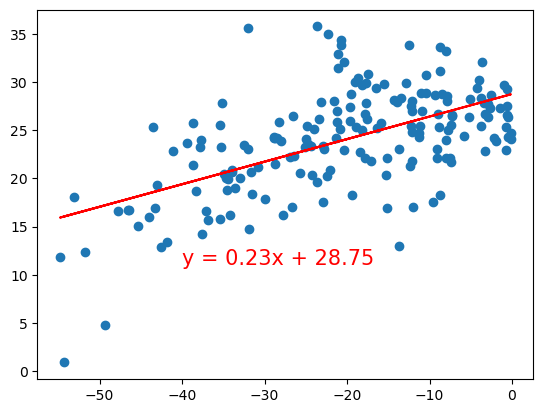

In [17]:
# Linear regression on Southern Hemisphere
regression_analysis(southern_hemi_df,'Lat','Max Temp')

**Discussion about the linear relationship:** Between cities in the Northern and Southern hemisphere, as cities move away from the equator the temperatures decrease and as latitude approaches zero, the temperatures increases. There is a stronger linear relationship in the Northern hemisphere dataset due to more cities located in the Northern hemisphere versus the Southern Hemisphere. 


### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.17103112537773757


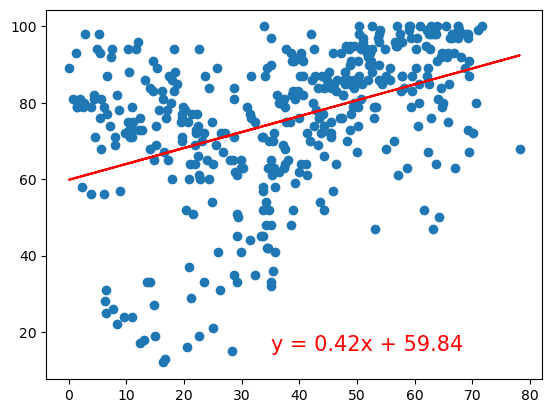

In [18]:
# Northern Hemisphere
regression_analysis(northern_hemi_df,'Lat','Humidity')

The r-value is : 0.04627552758765925


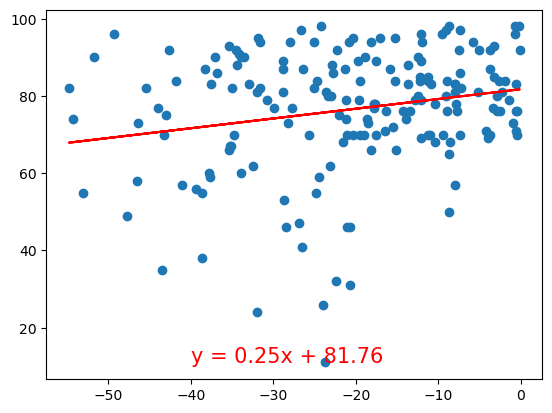

In [19]:
# Southern Hemisphere
regression_analysis(southern_hemi_df,'Lat','Humidity')

**Discussion about the linear relationship:** Between both Northern and Southern Hemispheres there is a weak linear correlation between Humidity versus latitude. In the Northern hemisphere, as the latitude increases there is a slight relationship to an increase in humidity. In the Southern Hemisphere, as the city data approaches the equator there is an increase in humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.03562022349571066


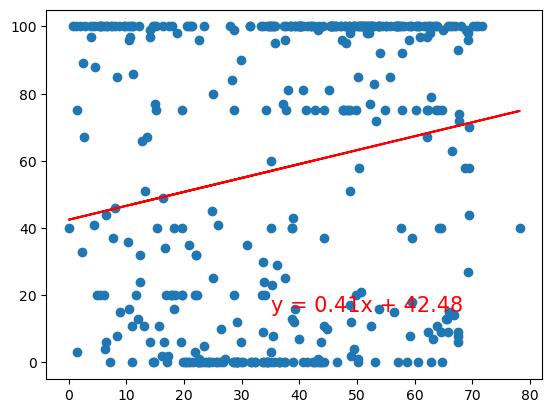

In [20]:
# Northern Hemisphere
regression_analysis(northern_hemi_df,'Lat','Cloudiness')

The r-value is : 0.02078137294679705


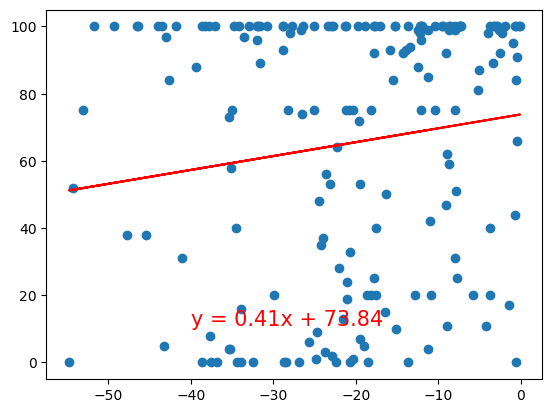

In [21]:
# Southern Hemisphere
regression_analysis(southern_hemi_df,'Lat','Cloudiness')

**Discussion about the linear relationship:** For both the Northern and Southern Hemisphere, there is a little to no linear relationship for cloudiness versus latitude increase or decrease. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.0036658457947148252


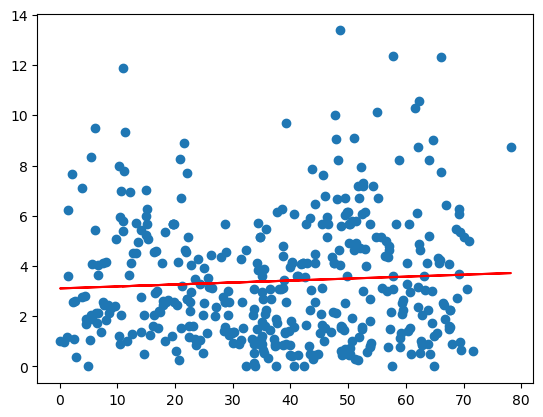

In [22]:
# Northern Hemisphere
regression_analysis(northern_hemi_df,'Lat','Wind Speed')

The r-value is : 0.15760137534955754


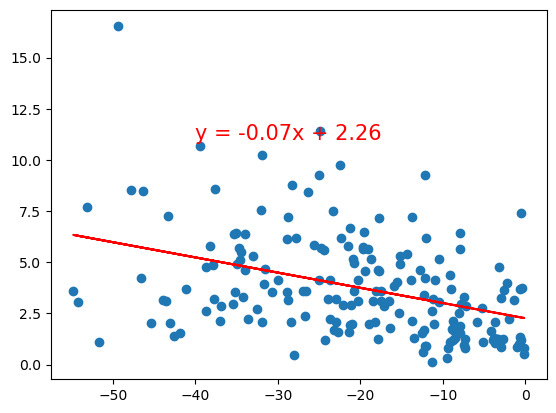

In [23]:
# Southern Hemisphere
regression_analysis(southern_hemi_df,'Lat','Wind Speed')

**Discussion about the linear relationship:** Between Northern and Southern Hemisphere datasets, there is a slight negative relationship in the Southern Hemisphere between Wind Speed and Latitude. As the city data approaches the equator there is a decrease in Wind speeds. In the Northern Hemisphere, the city data set there is little to no relationship between Wind Speed and latitude. The city data infers that weather Wind Speed was overall consistent across latitude increments. 